In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import pandas as pd



# Read your data
file_path = 'test_ML_prob.xlsx'
df = pd.read_excel(file_path)
df

,EMDB,resolution,pdbname,chain,resid,resname,ss,c_prob,p_ALA,p_ARG,...,p_LEU,p_LYS,p_MET,p_PHE,p_PRO,p_SER,p_THR,p_TRP,p_TYR,p_VAL
0,EMD-11309,4.3,h_11_A_170_180,A,170,VAL,H,0.111645,0.010180,0.035608,...,0.229129,0.055692,0.052315,0.020291,0.007976,0.034152,0.079815,0.001062,0.010081,0.111645
1,EMD-11309,4.3,h_11_A_170_180,A,171,SER,H,0.087374,0.036424,0.138452,...,0.011952,0.128573,0.010095,0.005588,0.008823,0.087374,0.068543,0.000828,0.009101,0.015422
2,EMD-11309,4.3,h_11_A_170_180,A,172,GLU,H,0.267391,0.031367,0.023818,...,0.028235,0.116408,0.012079,0.002345,0.001152,0.091481,0.151050,0.000058,0.002117,0.097055
3,EMD-11309,4.3,h_11_A_170_180,A,173,LEU,H,0.469618,0.007697,0.011058,...,0.469618,0.017845,0.077770,0.026367,0.002444,0.010759,0.018755,0.001396,0.009572,0.090689
4,EMD-11309,4.3,h_11_A_170_180,A,174,ASP,H,0.035939,0.197468,0.007295,...,0.031035,0.016102,0.016813,0.003238,0.001750,0.106170,0.132166,0.000174,0.002259,0.229997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742775,EMD-9404,3.8,h_28_E_447_474,E,470,TYR,H,0.001984,0.014743,0.002388,...,0.002015,0.003465,0.143081,0.001313,0.001783,0.003166,0.013725,0.768944,0.006852,0.001984
742776,EMD-9404,3.8,h_28_E_447_474,E,471,TRP,H,0.005845,0.011564,0.003323,...,0.002389,0.003964,0.144211,0.003509,0.003863,0.004400,0.569174,0.165323,0.009903,0.005845
742777,EMD-9404,3.8,h_28_E_447_474,E,472,SER,H,0.009432,0.055147,0.041655,...,0.078334,0.067624,0.048321,0.001512,0.023202,0.040481,0.002464,0.030302,0.084747,0.009432
742778,EMD-9404,3.8,h_28_E_447_474,E,473,ILE,H,0.005197,0.015298,0.139942,...,0.017781,0.030393,0.011360,0.003135,0.016462,0.059787,0.001038,0.008324,0.148217,0.005197


In [4]:
# Specify the column containing true class labels
y_true_column = 'resname'  # Replace with the actual column containing true class labels
y_true = df[y_true_column].values

# Extract relevant columns for predicted probabilities
y_score_columns = df.columns[8:]  
y_score = df[y_score_columns].values

# Binarize the output for one-vs-all ROC evaluation
y_true_bin = label_binarize(y_true, classes=np.unique(y_true))
print(len(df))

742780


In [5]:
df.columns[8], y_score.shape
# Initialize variables for micro-average
all_fpr = np.unique(np.concatenate([roc_curve(y_true_bin[:, i], y_score[:, i])[0] for i in range(y_true_bin.shape[1])]))
mean_tpr = np.zeros_like(all_fpr)
#all_fpr.shape, y_true_bin.shape[1]

roc_auc_macro = []

# Compute micro-average and macro-average ROC AUC
for i in range(y_true_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    mean_tpr += np.interp(all_fpr, fpr, tpr)
    
    roc_auc = auc(fpr, tpr)
    roc_auc_macro.append(roc_auc)

mean_tpr /= y_true_bin.shape[1]
print(mean_tpr)

[0.00880232 0.00880232 0.01253771 ... 0.99999877 1.         1.        ]


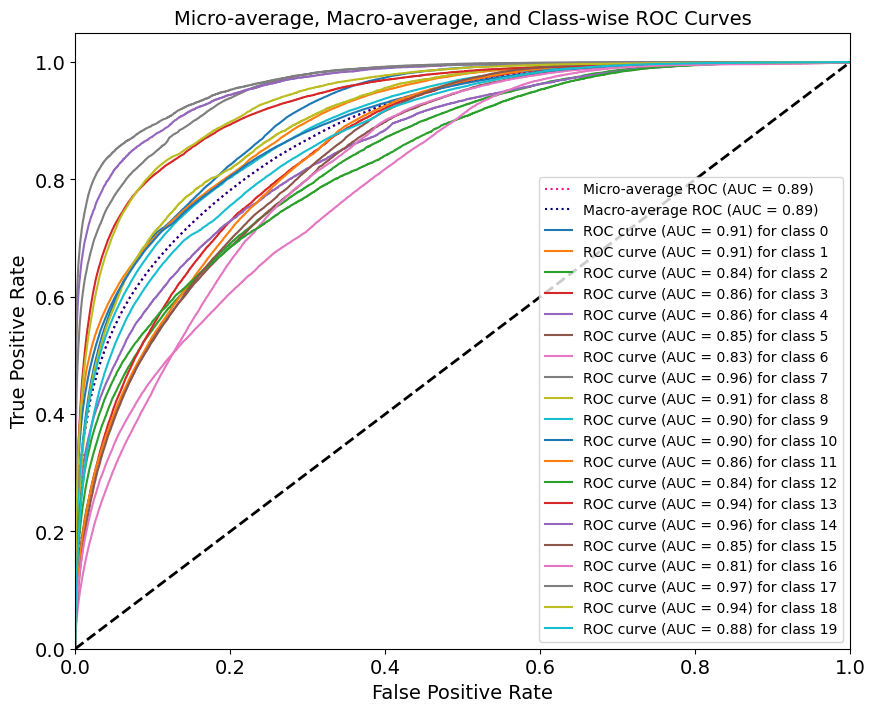

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import pandas as pd
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 28

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Compute micro-average ROC AUC
micro_auc = auc(all_fpr, mean_tpr)

# Compute macro-average ROC AUC
macro_auc = np.mean(roc_auc_macro)

# Plot micro-average ROC curve
plt.figure(figsize=(10, 8))
plt.plot(all_fpr, mean_tpr, label=f'Micro-average ROC (AUC = {micro_auc:.2f})', color='deeppink', linestyle=':')

# Plot macro-average ROC curve
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.mean([np.interp(mean_fpr, fpr, tpr) for fpr, tpr in zip([roc_curve(y_true_bin[:, i], y_score[:, i])[0] for i in range(y_true_bin.shape[1])], 
                                                                    [roc_curve(y_true_bin[:, i], y_score[:, i])[1] for i in range(y_true_bin.shape[1])])], axis=0)

roc_auc_macro = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, label=f'Macro-average ROC (AUC = {roc_auc_macro:.2f})', color='navy', linestyle=':')

# Plot individual ROC curves for each class
for i in range(y_true_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f}) for class {i}')

# Plot the random line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro-average, Macro-average, and Class-wise ROC Curves')
plt.legend(loc="lower right")
plt.show()

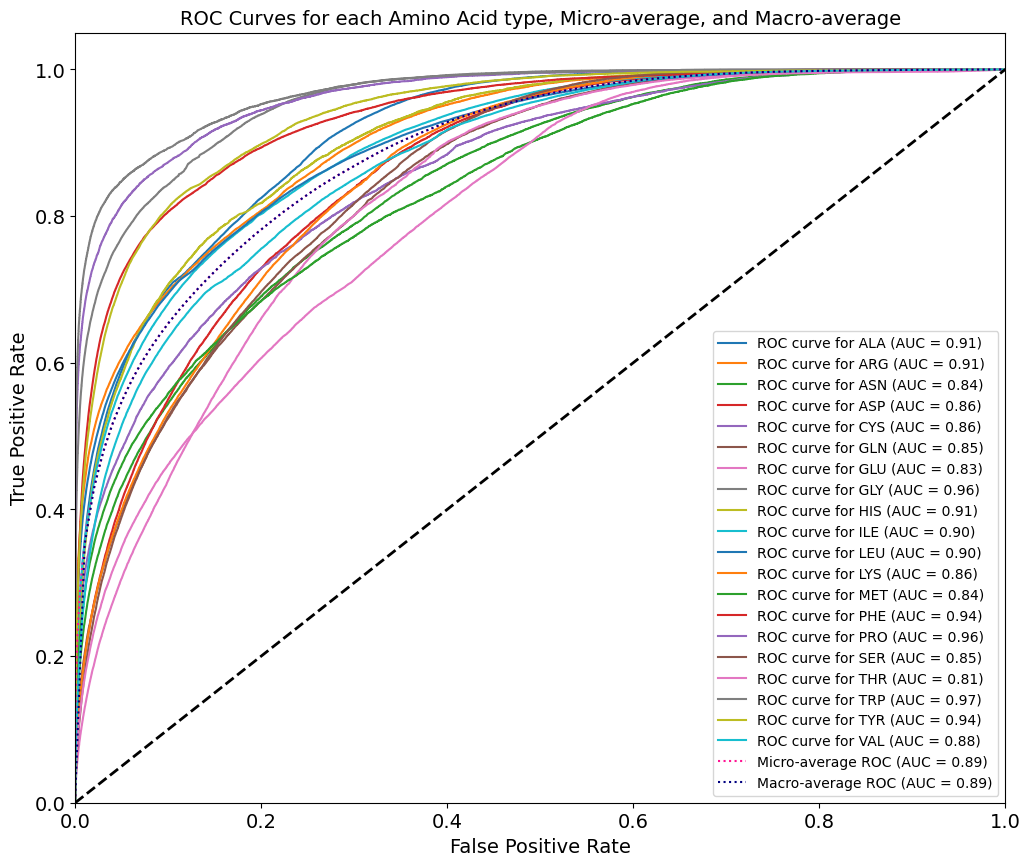

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import pandas as pd

SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 28

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


# Read your data
file_path = 'test_ML_prob.xlsx'
df = pd.read_excel(file_path)

# Specify the column containing true class labels
y_true_column = 'resname'  # Replace with the actual column containing true class labels
y_true = df[y_true_column].values

# Extract relevant columns for predicted probabilities
y_score_columns = df.columns[8:]  # Assuming predicted probabilities start from column index 7
y_score = df[y_score_columns].values

# Binarize the output for one-vs-all ROC evaluation
y_true_bin = label_binarize(y_true, classes=np.unique(y_true))

# Plot ROC curves for each class
plt.figure(figsize=(12, 10))
for i, resname in enumerate(np.unique(y_true)):
    class_index = np.where(np.unique(y_true) == resname)[0][0]
    fpr, tpr, _ = roc_curve(y_true_bin[:, class_index], y_score[:, class_index])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve for {resname} (AUC = {roc_auc:.2f})')

# Plot micro-average ROC curve
all_fpr = np.unique(np.concatenate([roc_curve(y_true_bin[:, i], y_score[:, i])[0] for i in range(y_true_bin.shape[1])]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(y_true_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    mean_tpr += np.interp(all_fpr, fpr, tpr)

mean_tpr /= y_true_bin.shape[1]
micro_auc = auc(all_fpr, mean_tpr)
plt.plot(all_fpr, mean_tpr, label=f'Micro-average ROC (AUC = {micro_auc:.2f})', color='deeppink', linestyle=':')

# Plot macro-average ROC curve
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.mean([np.interp(mean_fpr, fpr, tpr) for fpr, tpr in zip([roc_curve(y_true_bin[:, i], y_score[:, i])[0] for i in range(y_true_bin.shape[1])], 
                                                                    [roc_curve(y_true_bin[:, i], y_score[:, i])[1] for i in range(y_true_bin.shape[1])])], axis=0)
roc_auc_macro = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, label=f'Macro-average ROC (AUC = {roc_auc_macro:.2f})', color='navy', linestyle=':')

# Plot the random line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for each Amino Acid type, Micro-average, and Macro-average')
plt.legend(loc="lower right")
plt.savefig("ROC_curves.png")

In [8]:
y_score_df = df[list(y_score_columns)]
y_true_df = df[['EMDB','resolution','resname','ss']]
# assign the class label with highest predicted probability
y_score_df['max_id'] = y_score_df.idxmax(axis=1)

pred_class = {'p_ALA': 0, 'p_ARG': 1, 'p_ASN': 2, 'p_ASP': 3, 'p_CYS': 4, 'p_GLN': 5, 'p_GLU': 6, 'p_GLY': 7,
       'p_HIS': 8, 'p_ILE': 9, 'p_LEU': 10, 'p_LYS': 11, 'p_MET': 12, 'p_PHE': 13, 'p_PRO': 14, 'p_SER': 15,
       'p_THR':16, 'p_TRP': 17, 'p_TYR': 18, 'p_VAL':19}

true_class = {'ALA': 0, 'ARG': 1, 'ASN': 2, 'ASP': 3, 'CYS': 4, 'GLN': 5, 'GLU': 6, 'GLY': 7,
       'HIS': 8, 'ILE': 9, 'LEU': 10, 'LYS': 11, 'MET': 12, 'PHE': 13, 'PRO': 14, 'SER': 15,
       'THR':16, 'TRP': 17, 'TYR': 18, 'VAL':19}
y_score_df['Pred_class'] = y_score_df['max_id'].map(pred_class)
y_true_df['True_class'] = y_true_df['resname'].map(true_class)
final_assigned_class_df =pd.concat([y_true_df, y_score_df], axis=1)
print(final_assigned_class_df.head(5))
#print(y_score_df.head(100))

        EMDB  resolution resname ss  True_class     p_ALA     p_ARG     p_ASN  \
0  EMD-11309         4.3     VAL  H          19  0.010180  0.035608  0.049865   
1  EMD-11309         4.3     SER  H          15  0.036424  0.138452  0.037686   
2  EMD-11309         4.3     GLU  H           6  0.031367  0.023818  0.021323   
3  EMD-11309         4.3     LEU  H          10  0.007697  0.011058  0.016212   
4  EMD-11309         4.3     ASP  H           3  0.197468  0.007295  0.007813   

      p_ASP     p_CYS  ...     p_MET     p_PHE     p_PRO     p_SER     p_THR  \
0  0.008988  0.008870  ...  0.052315  0.020291  0.007976  0.034152  0.079815   
1  0.178157  0.007155  ...  0.010095  0.005588  0.008823  0.087374  0.068543   
2  0.086984  0.005854  ...  0.012079  0.002345  0.001152  0.091481  0.151050   
3  0.008528  0.012562  ...  0.077770  0.026367  0.002444  0.010759  0.018755   
4  0.035939  0.082676  ...  0.016813  0.003238  0.001750  0.106170  0.132166   

      p_TRP     p_TYR     p_VAL 

/var/folders/s2/b26ycjdd5g76kw72gb01g2vw0000gp/T/ipykernel_4002/3251610362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_score_df['max_id'] = y_score_df.idxmax(axis=1)
/var/folders/s2/b26ycjdd5g76kw72gb01g2vw0000gp/T/ipykernel_4002/3251610362.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_score_df['Pred_class'] = y_score_df['max_id'].map(pred_class)
/var/folders/s2/b26ycjdd5g76kw72gb01g2vw0000gp/T/ipykernel_4002/3251610362.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy

/var/folders/s2/b26ycjdd5g76kw72gb01g2vw0000gp/T/ipykernel_4002/2685983445.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = final_assigned_class_df.groupby(['ResBins'])


overall accuracy 40.669837128183346
742780
1251


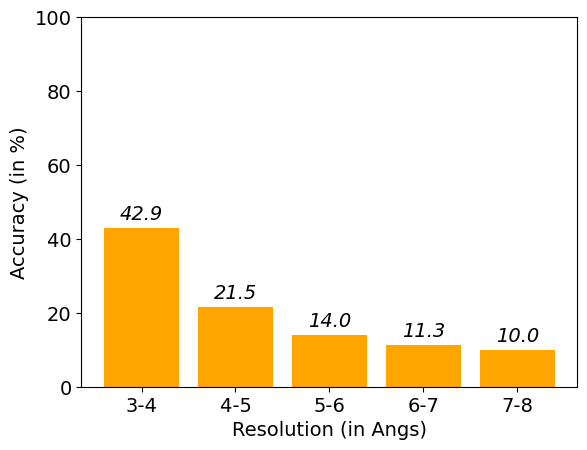

In [9]:
# Calculate Accuracy of predictions
import sklearn
import matplotlib.pyplot as plt
import numpy as np
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 28

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

bins_ = [3,4,5,6,7,8]
labels_ = ['3-4', '4-5', '5-6', '6-7', '7-8']
final_assigned_class_df['ResBins'] = pd.cut(final_assigned_class_df['resolution'], bins=bins_, labels=labels_)
#print(cm_matrix[0,:])
grouped_df = final_assigned_class_df.groupby(['ResBins'])
x_bar = []
y_bar = []
overall_acc = 0
for gr, gr_df in grouped_df:
    acc = 0
    cm_matrix = sklearn.metrics.confusion_matrix(gr_df['True_class'], gr_df['Pred_class'])
    for i in range(0,20):
        aa = [k for k, v in true_class.items() if v == i][0]
        acc_i  = 100*(cm_matrix[i,i]/sum(cm_matrix[i,:]))
#        print(aa, acc_i)
        acc += acc_i
    Avg_acc= acc/20

    x_bar.append(gr[0])
    y_bar.append(Avg_acc)
y_bar_all = y_bar
bars = plt.bar(np.asarray(x_bar), np.asarray(y_bar), color='orange')
plt.ylabel("Accuracy (in %)")
plt.xlabel("Resolution (in Angs)")
plt.ylim(0,100)

for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{round(height,1)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
    textcoords="offset points", ha='center', va='bottom', fontstyle='italic')
plt.savefig("res_pred_acc_vs_resolution.png")
cm_matrix_ = sklearn.metrics.confusion_matrix(final_assigned_class_df['True_class'], final_assigned_class_df['Pred_class'])
for i in range(0,20):
    aa = [k for k, v in true_class.items() if v == i][0]
    acc_i_  = 100*(cm_matrix_[i,i]/sum(cm_matrix_[i,:]))
#   print(aa, acc_i)
    overall_acc += acc_i_
print("overall accuracy", overall_acc/20)
print(len(final_assigned_class_df))
print(len(final_assigned_class_df['EMDB'].unique()))

In [10]:
# four class classification
# from this paper Full-length de novo protein structure determination from cryo-EM maps using deep learning (fig 2; 
# and from Bottom-up structural proteomics: cryoEM of protein complexes enriched from the cellular milieu
pred_class_reduced = {'p_ALA': 0, 'p_ARG': 2, 'p_ASN': 1, 'p_ASP': 1, 'p_CYS': 0, 'p_GLN': 1, 'p_GLU': 1, 'p_GLY': 0,
       'p_HIS': 3, 'p_ILE': 0, 'p_LEU': 1, 'p_LYS': 2, 'p_MET': 1, 'p_PHE': 3, 'p_PRO': 0, 'p_SER': 0,
       'p_THR':0, 'p_TRP': 3, 'p_TYR': 3, 'p_VAL':0}

true_class_reduced = {'ALA': 0, 'ARG': 2, 'ASN': 1, 'ASP': 1, 'CYS': 0, 'GLN': 1, 'GLU': 1, 'GLY': 0,
       'HIS': 3, 'ILE': 0, 'LEU': 1, 'LYS': 2, 'MET': 1, 'PHE': 3, 'PRO': 0, 'SER': 0,
       'THR':0, 'TRP': 3, 'TYR': 3, 'VAL':0}
y_score_df['Pred_class'] = y_score_df['max_id'].map(pred_class_reduced)
y_true_df['True_class'] = y_true_df['resname'].map(true_class_reduced)
final_class_reduced =pd.concat([y_true_df, y_score_df], axis=1)

/var/folders/s2/b26ycjdd5g76kw72gb01g2vw0000gp/T/ipykernel_4002/1537449907.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_score_df['Pred_class'] = y_score_df['max_id'].map(pred_class_reduced)
/var/folders/s2/b26ycjdd5g76kw72gb01g2vw0000gp/T/ipykernel_4002/1537449907.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_true_df['True_class'] = y_true_df['resname'].map(true_class_reduced)


/var/folders/s2/b26ycjdd5g76kw72gb01g2vw0000gp/T/ipykernel_4002/2183905842.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df_ = final_class_reduced.groupby(['ResBins'])


[[260671  61723  11048   2301]
 [ 64514 141010  24604   3912]
 [ 14874  15449  41546   2179]
 [ 10352   9962   8807  69828]]
['ALA', 'CYS', 'GLY', 'ILE', 'PRO', 'SER', 'THR', 'VAL'] 77.64004014975741
['ASN', 'ASP', 'GLN', 'GLU', 'LEU', 'MET'] 60.250384549649624
['ARG', 'LYS'] 56.10684961106309
['HIS', 'PHE', 'TRP', 'TYR'] 70.5696874147288
overall accuracy 66.14174043129974


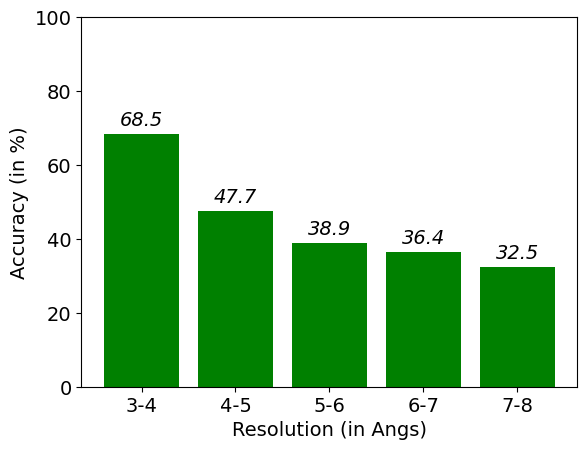

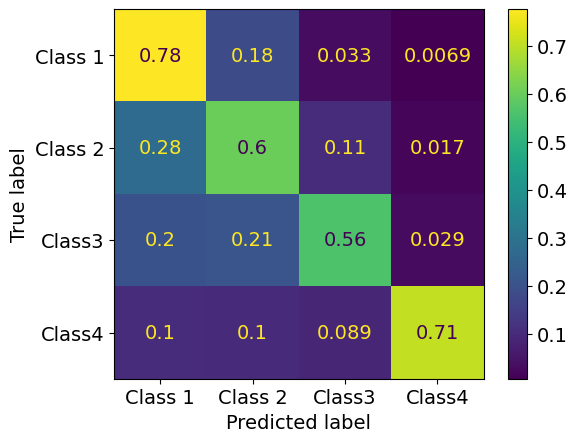

In [11]:
import sklearn
import sklearn.metrics
SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 28

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

final_class_reduced['ResBins'] = pd.cut(final_class_reduced['resolution'], bins=bins_, labels=labels_)
#print(cm_matrix[0,:])
grouped_df_ = final_class_reduced.groupby(['ResBins'])
x_bar = []
y_bar = []
overall_acc = 0
for gr, gr_df in grouped_df_:
    acc = 0
    cm_matrix = sklearn.metrics.confusion_matrix(gr_df['True_class'], gr_df['Pred_class'])
    for i in range(0,4):
        aa = [k for k, v in true_class_reduced.items() if v == i][0]
        acc_i  = 100*(cm_matrix[i,i]/sum(cm_matrix[i,:]))
#        print(aa, acc_i)
        acc += acc_i
    Avg_acc= acc/4

    x_bar.append(gr[0])
    y_bar.append(Avg_acc)
y_bar_group = y_bar
bars = plt.bar(np.asarray(x_bar), np.asarray(y_bar), color='green')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{round(height,1)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
    textcoords="offset points", ha='center', va='bottom', fontstyle='italic')
plt.ylabel("Accuracy (in %)")
plt.xlabel("Resolution (in Angs)")
plt.ylim(0,100)
plt.savefig("res_pred_acc_vs_res_reduced.png")
cm_matrix_ = sklearn.metrics.confusion_matrix(final_class_reduced['True_class'], final_class_reduced['Pred_class'])
print(cm_matrix_)
#disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm_matrix_,display_labels=np.asarray(['Class 1', 'Class 2', 'Class3', 'Class4']))
disp = sklearn.metrics.ConfusionMatrixDisplay.from_predictions(final_class_reduced['True_class'], final_class_reduced['Pred_class'],display_labels=np.asarray(['Class 1', 'Class 2', 'Class3', 'Class4']), normalize='true')
overall_acc_ = 0
for i in range(0,4):
    aa = [k for k, v in true_class_reduced.items() if v == i]
    acc_i_  = 100*(cm_matrix_[i,i]/sum(cm_matrix_[i,:]))
    print(aa, acc_i_)
    overall_acc_ += acc_i_
print("overall accuracy", overall_acc_/4)
#disp.plot()
plt.savefig("Confusion_matrix_four_class.png")

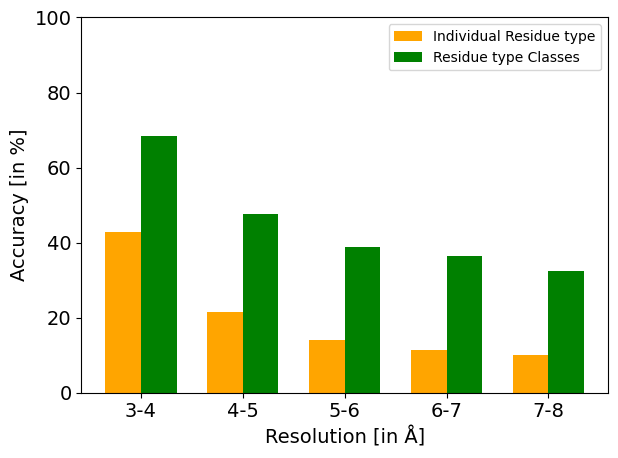

In [12]:
# Set the bar width
# Set the bar width
bar_width = 0.35

# Set positions of the bars
x_positions = np.arange(len(x_bar))

# Create the bars
plt.bar(x_positions - bar_width/2, np.asarray(y_bar_all), width=bar_width, label='Individual Residue type', color='orange', align='center')
plt.bar(x_positions + bar_width/2, np.asarray(y_bar_group), width=bar_width, label='Residue type Classes', color='green', align='center')

# Add labels and title
plt.xlabel('Resolution [in Å]')
plt.ylabel('Accuracy [in %]')
plt.ylim(0,100)
plt.xticks(x_positions, x_bar)  # Set the x-ticks to the category names
plt.legend()

# Show the plot
plt.tight_layout()
#plt.show()
plt.savefig("res_pred_acc_vs_res_combined.png")


# Tried to Use RocCurveDisplay Command to compare results

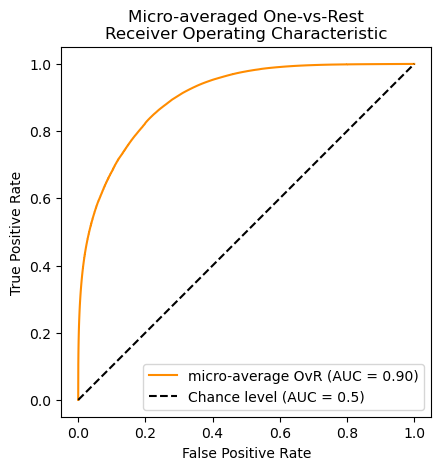

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_true_bin.ravel(),
    y_score.ravel(),
    name="micro-average OvR",
    color="darkorange",
    plot_chance_level=True,
)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Micro-averaged One-vs-Rest\nReceiver Operating Characteristic")
plt.legend()
plt.show()

In [58]:
# store the fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()

for i in range(y_true_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(y_true_bin.shape[1]):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= y_true_bin.shape[1]

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

Macro-averaged One-vs-Rest ROC AUC score:
0.89
Micro-averaged One-vs-Rest ROC AUC score:
0.90


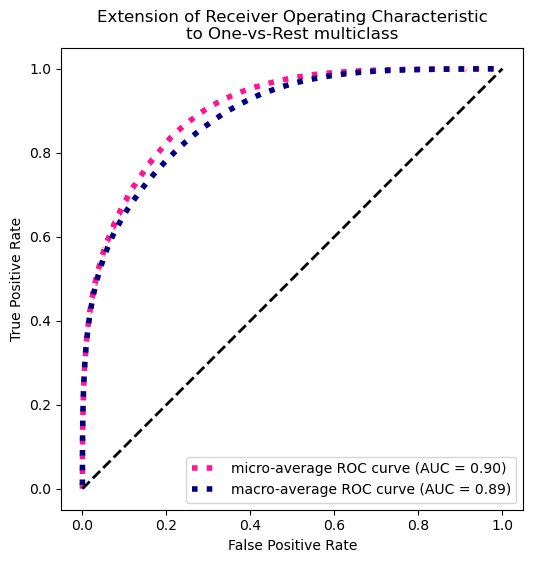

In [57]:
from itertools import cycle

fig, ax = plt.subplots(figsize=(6, 6))

plt.plot(
    fpr["micro"],
    tpr["micro"],
    label=f"micro-average ROC curve (AUC = {roc_auc['micro']:.2f})",
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)
# Plot the random line
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Extension of Receiver Operating Characteristic\nto One-vs-Rest multiclass")
plt.legend()
plt.show()